В этом ноутбуке все результаты обработки тестового куска генома микобактерии 0-500,000

In [1]:
from __future__ import print_function
import os
import numpy as np
from sequence_for_nn import *

In [9]:
container = Container()
container.read_seq(genome_file = "../data/myco.gbff", genome_file_type = "genbank")
container.cut_seq(length = 500000)
container.generate_seq()

container created
read seq from file ../data/myco.gbff, length = 4411532
cuted seq for analysis, length = 500000, start = 0, part = 0.0-11.3
generated seq_np


In [13]:
seq_np = get_seq_np(path)
np.equal(seq_np, container.seq_np)

array([[ True,  True,  True, ...,  True,  True, False],
       [ True,  True,  True, ..., False,  True, False],
       [ True,  True,  True, ..., False, False,  True],
       [ True,  True,  True, ...,  True, False,  True]], dtype=bool)

In [2]:
path = "../results/03-17-21-37_0.0-11.4_AP018033.1_Mycobacterium"
info = open(path + "/info.txt")
for line in info.readlines():
    print(line, end = "")
info.close()

03-17-21-37
0500000_000000000_0.0-11.4_47579_AP018033.1_Mycobacterium_tuberculosis_DNA,_complete_genome,_strain:_HN-024
skip_depth6,reflection,net,adam,noise,32,0.01,0.03,4001,True,189300,[128, 128, 128],[128, 128, 128],[128, 128, 128],3,3,nearest,1,True,True,reflection,LeakyReLU
skip_depth6,reflection,net,adam,noise,32,0.01,0.03,4001,True,189300,[128, 128, 128],[128, 128, 128],[128, 128, 128],3,3,nearest,1,True,True,reflection,LeakyReLU
1409.887s	GeForce GTX TITAN X


In [4]:
number_of_outs(path)

41

In [5]:
distances_to_right = get_distances_to_right(path)

found np array ../results/03-17-21-37_0.0-11.4_AP018033.1_Mycobacterium/distances_to_right.npy


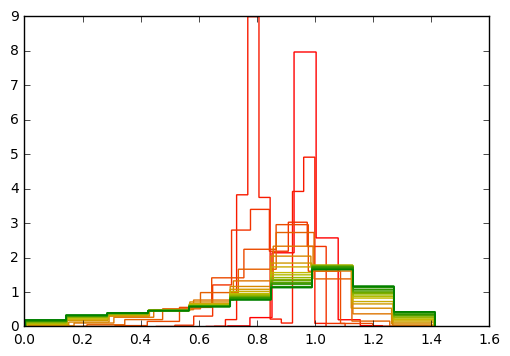

In [6]:
import matplotlib.pyplot as plt
from colour import Color
red = Color("red")
colors = list(red.range_to(Color("green"),20))
for i in range(20):
    plt.hist(distances_to_right[i], histtype='step',normed = True, color = colors[i].get_rgb())
# #     plt.hist(diffs[19], histtype='step',normed = True, color = 'green')
# #     plt.hist(diffs[9], histtype='step',normed = True, color = 'yellow')
# #     plt.hist(diffs[0],  histtype='step',normed = True,color = 'red')
plt.show()

In [8]:
diff = get_diff(path)
diff.shape

found np array ../results/03-17-21-37_0.0-11.4_AP018033.1_Mycobacterium/diff.npy


(500000,)

In [23]:
counter = generate_counter(diff, get_mask(path))
counter

generated counter


{'all_mist': 338558.0,
 'free_mist': 322931.0,
 'free_part': 0.71378428499119184,
 'mask_mist': 15627.0,
 'mask_part': 0.32844322074864962}

In [24]:
import pickle

In [25]:
filename = os.path.join(path, "counters")
with open(filename, "wb") as file:
    pickle.dump(counter,file)  


In [26]:
with open(filename, "rb") as file:
    a = pickle.load(file) 
a

{'all_mist': 338558.0,
 'free_mist': 322931.0,
 'free_part': 0.71378428499119184,
 'mask_mist': 15627.0,
 'mask_part': 0.32844322074864962}

In [3]:
get_diff(path)

found file ../results/03-17-21-37_0.0-11.4_AP018033.1_Mycobacterium/diffs.npy


array([[ 1.,  1.,  1., ...,  1.,  0.,  1.],
       [ 1.,  1.,  0., ...,  1.,  1.,  1.],
       [ 1.,  1.,  0., ...,  1.,  0.,  1.],
       ..., 
       [ 1.,  1.,  1., ...,  1.,  1.,  1.],
       [ 1.,  1.,  1., ...,  1.,  1.,  1.],
       [ 1.,  1.,  0., ...,  1.,  1.,  1.]])

In [4]:
get_diff(path).shape

found file ../results/03-17-21-37_0.0-11.4_AP018033.1_Mycobacterium/diffs.npy


(41, 500000)

In [3]:
counters = get_counters(path)

found file ../results/03-17-21-37_0.0-11.4_AP018033.1_Mycobacterium/counters.pyob


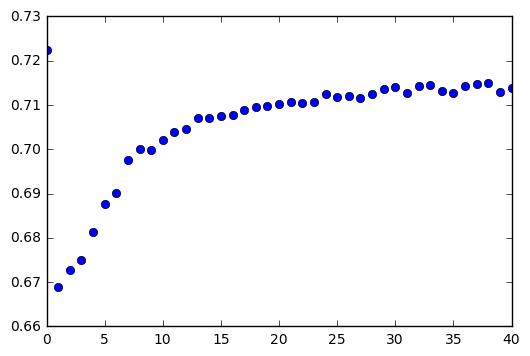

In [6]:
import matplotlib
import matplotlib.pyplot as plt
y = [counter['free_part'] for counter in counters]
fig, ax = plt.subplots()
ax.plot(y, "bo")
plt.show()

NameError: name 'StrToBytes' is not defined